In [ ]:
!apt-get install -y xvfb swig
!pip install gym[box2d] Box2D pyvirtualdisplay pygame stable-baselines3 shimmy>=2.0
!pip install gymnasium


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 swig4.0 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 swig swig4.0 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common xvfb
0 upgraded, 11 newly installed, 0 to remove and 0 not upgraded.
Need to get 8,930 kB of archives.
After this operation, 17.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.

In [ ]:
from pyvirtualdisplay import Display
import gymnasium as gym
from stable_baselines3 import DQN
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import clear_output
import time
from IPython.display import HTML
from matplotlib import rc
from stable_baselines3.common.evaluation import evaluate_policy

# Start a virtual display for rendering
display = Display(visible=0, size=(400, 300))
display.start()

# Initialize the LunarLander environment
env = gym.make("LunarLander-v3", render_mode="rgb_array")


<frozen importlib._bootstrap>:241: DeprecationWarning: builtin type SwigPyPacked has no __module__ attribute
<frozen importlib._bootstrap>:241: DeprecationWarning: builtin type SwigPyObject has no __module__ attribute
<frozen importlib._bootstrap>:241: DeprecationWarning: builtin type swigvarlink has no __module__ attribute


In [ ]:
# Create and train the DQN agent
model = DQN(
    "MlpPolicy",
    env,
    verbose=1,
    learning_rate=0.001,
    buffer_size=50000,
    learning_starts=1000,
    batch_size=64,
    gamma=0.99,
    train_freq=4,
    target_update_interval=500,
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
import sys
import os
from contextlib import contextmanager

# Context manager to suppress output
@contextmanager
def suppress_output():
    with open(os.devnull, 'w') as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:
            yield
        finally:
            sys.stdout = old_stdout

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Train the agent and render periodically
for i in range(2):  # Train in smaller steps to allow rendering
    with suppress_output():
        model.learn(total_timesteps=800, reset_num_timesteps=False)  # Suppress output here

    time.sleep(1)

    # Render the agent's performance
    obs, _ = env.reset()
    done = False
    moves = 0
    while not done and moves < 5000:
        action, _ = model.predict(obs, deterministic=True)
        obs, reward, done, truncated, info = env.step(action)

        # Capture the frame
        frame = env.render()  # Get the RGB frame from the environment

        if frame is not None and moves % 100 == 0:  # Ensure the frame is not empty
            print(f"Epoch {i}")
            # Display the frame
            plt.figure(figsize=(4, 3))
            plt.imshow(frame)
            plt.axis('off')
            clear_output(wait=True)  # Clear the previous output
            plt.show()

        moves += 1

KeyboardInterrupt: 

In [ ]:
# Evaluate the agent
mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=5, render=True)
print(f"Mean reward: {mean_reward} ± {std_reward}")

/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean reward: -16.405175560712813 ± 17.922878604407046


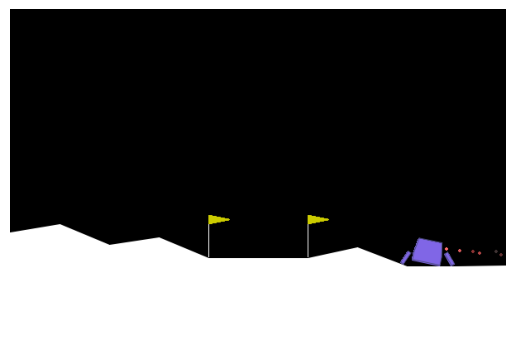

In [ ]:
# Enable jshtml for animations in Colab
rc('animation', html='jshtml')

# Test the trained agent
env = gym.make("LunarLander-v3", render_mode="rgb_array")

state, _ = env.reset()
done = False

# Initialize the plot
fig, ax = plt.subplots()
frame = env.render()  # Render the first frame
img = ax.imshow(frame)  # Display the first frame
plt.axis('off')

frames = []  # To store frames for the animation

# Generate frames
for _ in range(2000):
    if not done:
        # Predict the action
        action, _ = model.predict(state, deterministic=True)
        state, reward, done, _, _ = env.step(action)

        # Capture the frame
        frame = env.render()
        frames.append(frame)

# Define update function for animation
def update_frame(i):
    img.set_data(frames[i])
    return [img]

# Create the animation
ani = animation.FuncAnimation(fig, update_frame, frames=len(frames), interval=50, blit=True)

# Display the animation in Colab
ani

In [ ]:
model.save("lunarlander_dqn")
model = DQN.load("lunarlander_dqn", env)


In [ ]:
model = DQN.load("lunarlander_dqn", env)